In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
df=pd.read_excel('/content/drive/MyDrive/Deep Learning/Churn_Modelling.xlsx')

In [22]:
df.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2180,2181.0,15762902.0,Stanley,649.0,France,Female,42.0,7.0,0.00,2.0,0.0,1.0,22974.01,0.0
219,220.0,15774854.0,Fuller,592.0,France,Male,54.0,8.0,0.00,1.0,1.0,1.0,28737.71,1.0
7461,7462.0,15645571.0,Genovese,596.0,Spain,Male,32.0,4.0,0.00,2.0,0.0,1.0,146504.35,0.0
3407,3408.0,15797760.0,Bogdanov,632.0,France,Male,40.0,3.0,193354.86,2.0,1.0,0.0,149188.41,0.0
9914,9915.0,15568876.0,Hughes,496.0,France,Female,34.0,1.0,102723.35,2.0,1.0,0.0,180844.81,0.0
1951,1952.0,15589793.0,Onwuamaeze,604.0,France,Male,53.0,8.0,144453.75,1.0,1.0,0.0,190998.96,1.0
2001,2002.0,15734311.0,Hamilton,661.0,France,Female,27.0,3.0,0.00,2.0,1.0,1.0,76889.79,0.0
90,91.0,15757535.0,Heap,647.0,Spain,Female,44.0,5.0,0.00,3.0,1.0,1.0,174205.22,1.0
9495,9496.0,15763460.0,Yao,680.0,France,Male,33.0,10.0,183768.47,1.0,1.0,0.0,164119.35,0.0
4730,4731.0,15576550.0,Ugochukwu,619.0,Spain,Female,38.0,1.0,0.00,1.0,1.0,0.0,112442.63,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [24]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
df.duplicated().any()

False

In [26]:
cat_cols=df.select_dtypes(include='O')
cat_cols

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [27]:
num_cols=df.select_dtypes(include=['int64','float64'])
num_cols

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,9997.0,15569892.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998.0,15584532.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,9999.0,15682355.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [28]:
for i in cat_cols.columns:
  print(df[i].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


In [30]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [32]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3966,815.0,France,Male,35.0,4.0,0.00,2.0,0.0,1.0,198490.33,0.0
754,838.0,Spain,Female,39.0,5.0,166733.92,2.0,1.0,0.0,14279.44,0.0
236,712.0,France,Female,29.0,2.0,0.00,1.0,1.0,1.0,144375.00,0.0
2640,625.0,Spain,Female,31.0,8.0,0.00,2.0,1.0,0.0,151843.54,0.0
7351,654.0,Spain,Male,34.0,5.0,0.00,2.0,1.0,0.0,159311.46,0.0
4290,650.0,Spain,Female,23.0,5.0,0.00,1.0,1.0,1.0,180622.43,0.0
3167,637.0,France,Female,48.0,7.0,130806.99,2.0,1.0,1.0,132005.85,1.0
1987,738.0,France,Male,54.0,4.0,0.00,1.0,0.0,1.0,55725.04,1.0
7090,601.0,France,Male,47.0,1.0,64430.06,2.0,0.0,1.0,96517.97,0.0
7653,535.0,Spain,Female,30.0,5.0,122924.75,1.0,0.0,0.0,62390.59,1.0


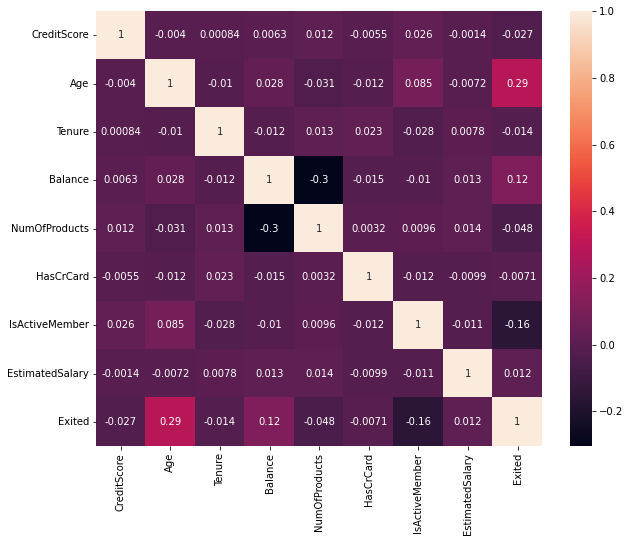

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
803,511.0,Spain,Female,29.0,9.0,0.00,2.0,0.0,1.0,140676.98,0.0
3390,674.0,France,Female,32.0,7.0,85757.93,1.0,1.0,1.0,95481.00,0.0
7998,829.0,Germany,Male,28.0,3.0,132405.52,3.0,1.0,0.0,104889.20,1.0
2301,676.0,France,Female,61.0,8.0,0.00,2.0,1.0,1.0,118522.73,0.0
4972,643.0,Germany,Male,41.0,2.0,127841.52,1.0,1.0,0.0,172363.41,0.0
8517,688.0,France,Male,20.0,8.0,137624.40,2.0,1.0,1.0,197582.79,0.0
5472,457.0,Germany,Male,42.0,4.0,126772.57,1.0,0.0,1.0,126106.40,0.0
5781,636.0,Germany,Male,36.0,6.0,96643.32,1.0,0.0,0.0,182059.28,0.0
5862,682.0,France,Male,40.0,4.0,0.00,2.0,1.0,1.0,140745.91,0.0
5545,609.0,Germany,Male,33.0,6.0,94126.67,1.0,0.0,0.0,93718.16,0.0


In [62]:
df['Exited']=df['Exited'].astype('int64')

In [75]:
cat_col=df.select_dtypes(include='O')
cat_col

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
oe=OrdinalEncoder()

In [77]:
for i in cat_col.columns:
  df[i]=oe.fit_transform(df[[i]])

In [78]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3075,556.0,0.0,1.0,35.0,10.0,0.00,2.0,1.0,1.0,192751.18,0
6508,850.0,1.0,1.0,42.0,6.0,84445.68,3.0,0.0,1.0,60021.34,1
6588,539.0,2.0,1.0,28.0,5.0,0.00,2.0,1.0,0.0,48382.40,0
8646,470.0,0.0,0.0,25.0,8.0,127974.06,2.0,1.0,1.0,183259.35,0
7395,721.0,1.0,0.0,45.0,7.0,138523.20,1.0,0.0,0.0,59604.45,1


In [79]:
X=df.iloc[:,:-1].values

In [80]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc=StandardScaler()

In [92]:
X=sc.fit_transform(X)

In [93]:
y=df.iloc[:,-1]

In [94]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.3)

In [97]:
from tensorflow.keras import Sequential

In [102]:
from tensorflow.keras.layers import Dense

In [103]:
ann=Sequential()

In [104]:
ann.add(Dense(units=6,activation="relu"))

In [105]:
ann.add(Dense(units=1,activation="sigmoid"))

In [106]:
ann.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
ann.fit(X_train,y_train,batch_size=30,epochs=100)

Epoch 1/100
234/234 [==============================] - 2s 2ms/step - loss: 0.7735 - accuracy: 0.4736
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7481
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7963
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7977
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8029
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8117
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8177
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8227
Epoch 9/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8296
Epoch 10/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4040 - accura

In [108]:
y_pred=ann.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [109]:
y_pred

array([[0.0216425 ],
       [0.05521026],
       [0.03527096],
       ...,
       [0.13921404],
       [0.18406504],
       [0.01232132]], dtype=float32)

In [110]:
y_pred=y_pred>0.5

In [111]:
y_pred=np.where(y_pred<0.5,0,1)

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2395
           1       0.81      0.44      0.57       605

    accuracy                           0.87      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

